# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 570


In [18]:
cities

['carnarvon',
 'labrador city',
 'blackmans bay',
 'hawaiian paradise park',
 'adamstown',
 'puerto ayora',
 'normal',
 'opochka',
 'udachny',
 'xilin hot',
 'aripuana',
 'portland',
 'hithadhoo',
 'salaberry-de-valleyfield',
 'tiksi',
 'rantauprapat',
 'ust-nera',
 'khandyga',
 'coquimbo',
 'bilibino',
 'namibe',
 'afaahiti',
 'marsh harbour',
 'waitangi',
 'aasiaat',
 'bredasdorp',
 'weno',
 'geraldton',
 'puerto natales',
 'punta arenas',
 'port-aux-francais',
 "st. john's",
 'wailua homesteads',
 'georgetown',
 'la sarre',
 'invercargill',
 'haiku-pauwela',
 'kavieng',
 'sivas',
 'newman',
 'margaret river',
 'puerto gaitan',
 'pachino',
 'santa cruz de tenerife',
 'badger',
 'stanley',
 'bengkulu',
 'gao',
 'missoula',
 'torghay',
 'papatowai',
 'kolonia town',
 'buala',
 'talnakh',
 'berezovyy',
 'port alfred',
 'fale old settlement',
 'grytviken',
 'kidatu',
 'hamilton',
 'margate',
 'bethel',
 'zyryanovsk',
 'kargasok',
 'saipan',
 'yellowknife',
 'edinburgh of the seven seas',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url)
        city_weather = city_weather_response.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp - 273.15,   #Convert from Kelvin to Celsius
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | labrador city
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | normal
Processing Record 8 of Set 1 | opochka
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | xilin hot
Processing Record 11 of Set 1 | aripuana
Processing Record 12 of Set 1 | portland
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | salaberry-de-valleyfield
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | rantauprapat
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | khandyga
Processing Record 19 of Set 1 | coquimbo
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | namibe
Processing Record 22 of Set 1 | afaahiti
Proc

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carnarvon,-24.8667,113.6333,20.45,76,35,6.71,AU,1724434218
1,labrador city,52.9463,-66.9114,20.95,46,75,0.00,CA,1724434406
2,blackmans bay,-43.0167,147.3167,9.07,92,100,0.45,AU,1724434407
3,hawaiian paradise park,19.5933,-154.9731,24.29,98,100,0.45,US,1724434408
4,adamstown,-25.0660,-130.1015,18.61,62,100,5.06,PN,1724434409


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carnarvon,-24.8667,113.6333,20.45,76,35,6.71,AU,1724434218
1,labrador city,52.9463,-66.9114,20.95,46,75,0.00,CA,1724434406
2,blackmans bay,-43.0167,147.3167,9.07,92,100,0.45,AU,1724434407
3,hawaiian paradise park,19.5933,-154.9731,24.29,98,100,0.45,US,1724434408
4,adamstown,-25.0660,-130.1015,18.61,62,100,5.06,PN,1724434409


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

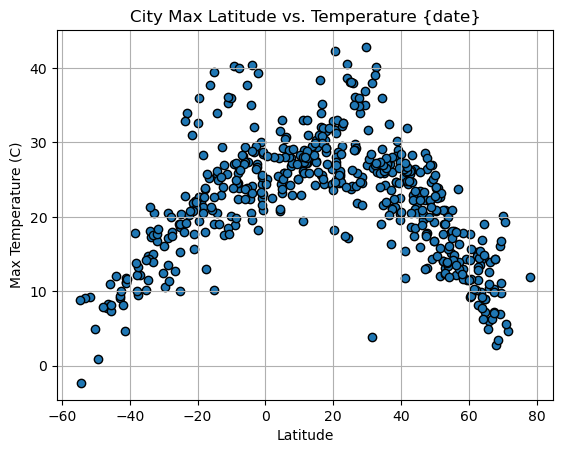

In [46]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature {date}")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

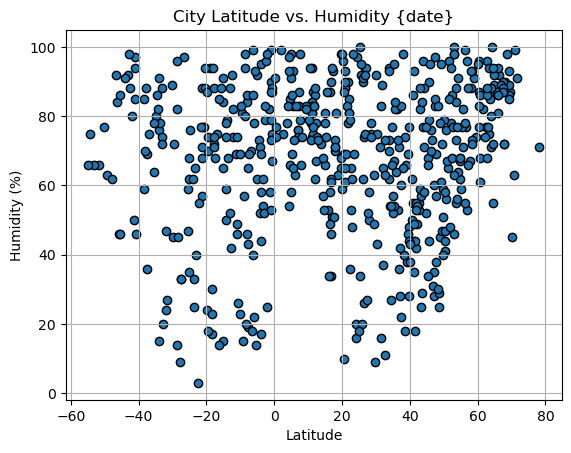

In [66]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

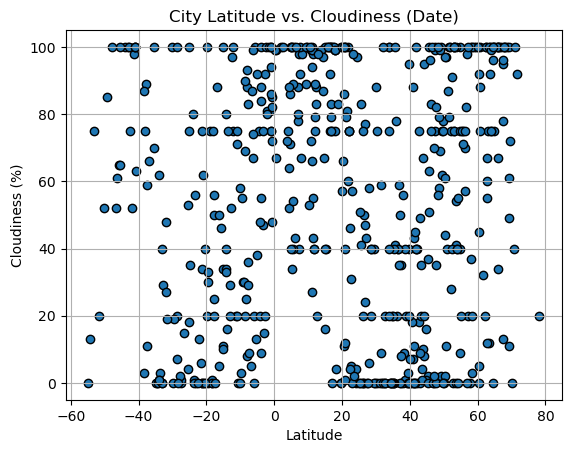

In [64]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

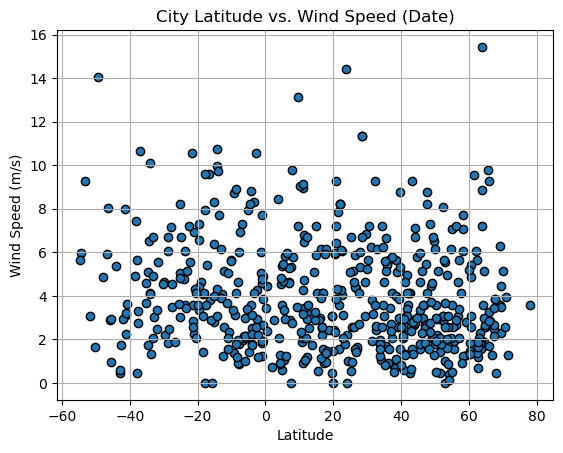

In [62]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [80]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,labrador city,52.9463,-66.9114,20.95,46,75,0.00,CA,1724434406
3,hawaiian paradise park,19.5933,-154.9731,24.29,98,100,0.45,US,1724434408
6,normal,40.5142,-88.9906,27.24,50,0,2.06,US,1724434411
7,opochka,56.7105,28.6617,13.84,77,82,3.08,RU,1724434412
8,udachny,66.4167,112.4000,13.94,92,100,2.85,RU,1724434413


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carnarvon,-24.8667,113.6333,20.45,76,35,6.71,AU,1724434218
2,blackmans bay,-43.0167,147.3167,9.07,92,100,0.45,AU,1724434407
4,adamstown,-25.0660,-130.1015,18.61,62,100,5.06,PN,1724434409
5,puerto ayora,-0.7393,-90.3518,20.86,87,85,2.68,EC,1724434410
10,aripuana,-9.1667,-60.6333,40.26,15,30,1.39,BR,1724434416


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.5315567269805432


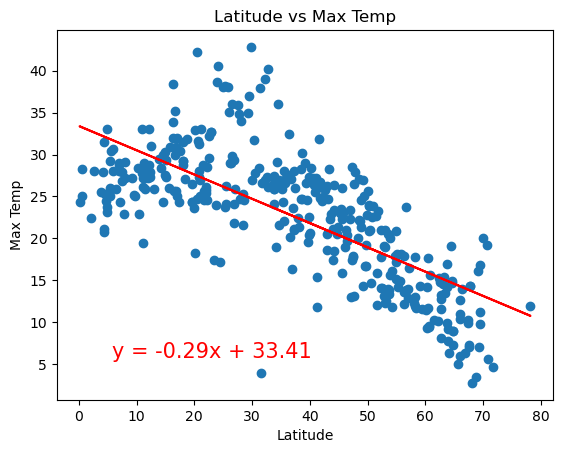

In [124]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,5.8),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r^2-value is: {rvalue**2}")
plt.show()



The r^2-value is: 0.581896667866995


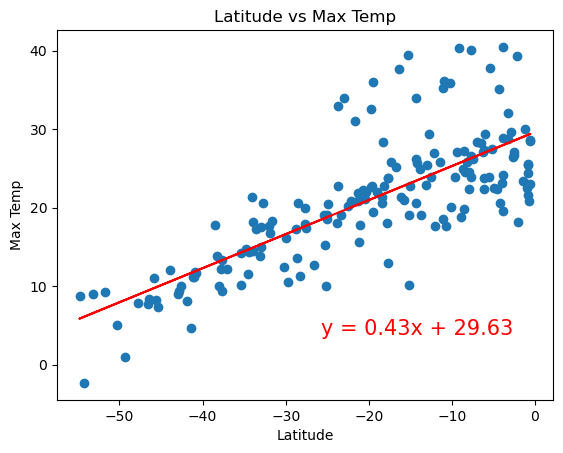

In [160]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25.8,3.8),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0019411775743578333


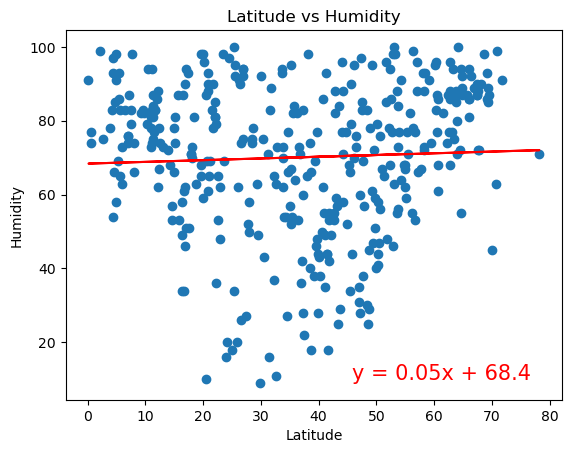

In [142]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45.8,9.8),fontsize=15,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.001972476995766901


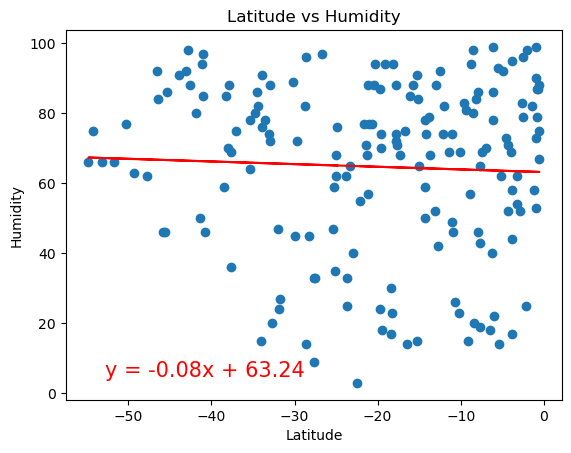

In [174]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52.8,4.8),fontsize=15,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.004404680651343768


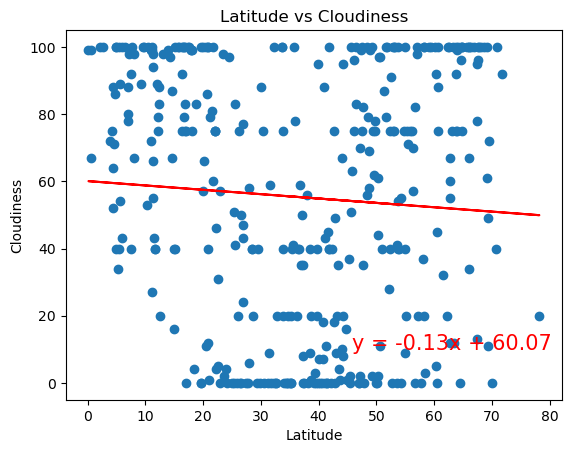

In [146]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45.8,9.8),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.00558238970986631


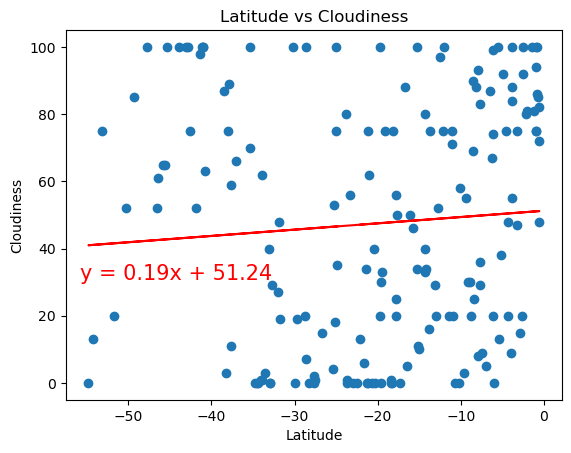

In [188]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55.8,30.8),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.004850858305993916


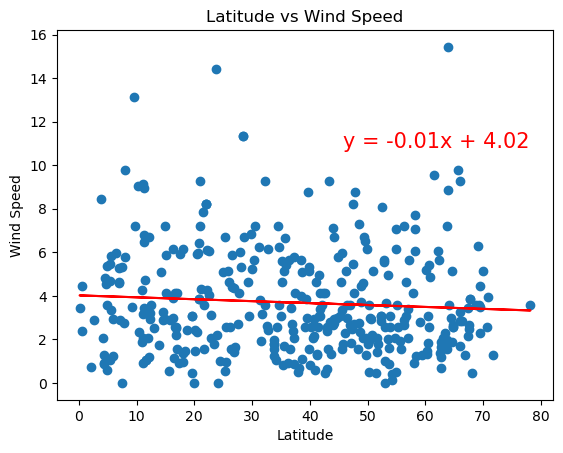

In [192]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45.8,10.8),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.00937050655281358


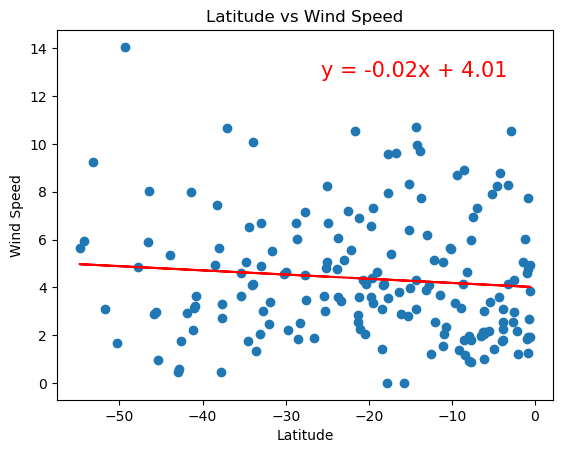

In [198]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25.8,12.8),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE